# AD-1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [2]:
path = os.path.abspath("")
file = path + "\\adfinal.csv"
file

'C:\\Users\\Abhignan\\OneDrive\\Desktop\\sem4\\AD project\\adfinal.csv'

In [3]:
df = pd.read_csv(file)
df

,Gender,Height,Weight,Index,Subscription
0,Male,174.0,96,4,0
1,Male,189.0,87,2,1
2,Female,185.0,110,4,0
3,Female,195.0,104,3,1
4,Male,149.0,61,3,0
...,...,...,...,...,...
499,Female,150.0,153,5,1
500,Female,184.0,121,4,0
501,Female,141.0,136,5,1
502,Male,150.0,95,5,0


In [4]:
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})
df['Gender'] = df['Gender'].astype(int)
df

,Gender,Height,Weight,Index,Subscription
0,0,174.0,96,4,0
1,0,189.0,87,2,1
2,1,185.0,110,4,0
3,1,195.0,104,3,1
4,0,149.0,61,3,0
...,...,...,...,...,...
499,1,150.0,153,5,1
500,1,184.0,121,4,0
501,1,141.0,136,5,1
502,0,150.0,95,5,0


In [5]:
df.shape

(504, 5)

In [6]:
pd.isnull(df)

,Gender,Height,Weight,Index,Subscription
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
499,False,False,False,False,False
500,False,False,False,False,False
501,False,False,False,False,False
502,False,False,False,False,False


In [7]:
pd.isnull(df).sum()

Gender          0
Height          2
Weight          0
Index           0
Subscription    0
dtype: int64

In [8]:
columns_to_check = ['Height']
rows_with_null_specific = df[df[columns_to_check].isnull().any(axis=1)]
rows_with_null_specific

,Gender,Height,Weight,Index,Subscription
11,1,NaN,98,3,0
45,0,NaN,110,4,1


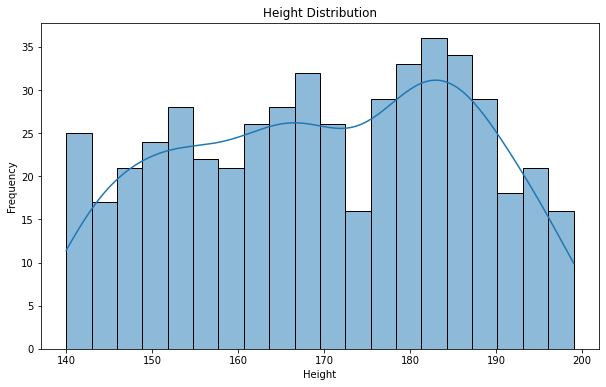

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Height'], bins=20, kde=True)
plt.title('Height Distribution')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()


In [10]:
df['Height'].fillna(df['Height'].median(), inplace=True)

In [11]:
df.isnull().sum()

Gender          0
Height          0
Weight          0
Index           0
Subscription    0
dtype: int64

In [12]:
dr=df[df.duplicated()]
dr

,Gender,Height,Weight,Index,Subscription
190,1,182.0,84,3,0
314,0,171.0,147,5,0
331,1,167.0,85,4,1
386,0,177.0,117,4,0
404,1,195.0,104,3,1
466,0,179.0,56,1,1


In [13]:
df[["Height"]].describe(include="all")

,Height
count,504.000000
mean,170.025794
std,16.363336
min,140.000000
25%,156.000000
50%,171.000000
75%,184.000000
max,199.000000


In [14]:
df[["Weight"]].describe(include="all")

,Weight
count,504.000000
mean,107.601190
std,41.136461
min,50.000000
25%,80.000000
50%,106.000000
75%,136.000000
max,523.000000


In [15]:
df[["Index"]].describe(include="all")

,Index
count,504.000000
mean,3.751984
std,1.352413
min,0.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


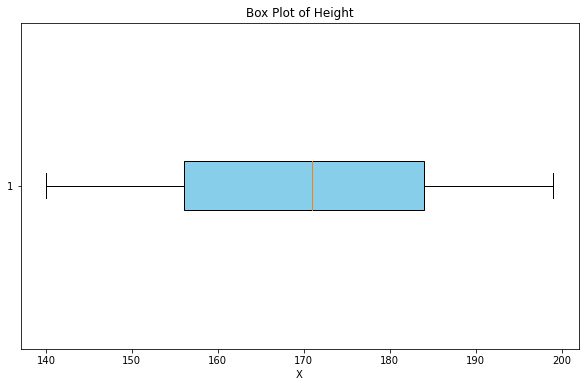

In [16]:
X = df['Height']

plt.figure(figsize=(10, 6))  
plt.boxplot(X, vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Box Plot of Height')
plt.xlabel('X')

plt.show()

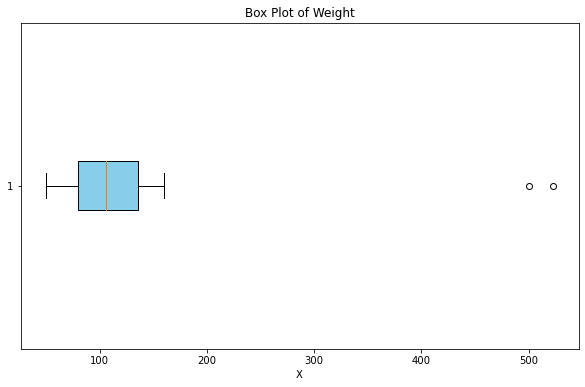

In [17]:
X = df['Weight']

plt.figure(figsize=(10, 6))  
plt.boxplot(X, vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Box Plot of Weight')
plt.xlabel('X')

plt.show()

In [18]:
# Calculate the IQR for Horsepower
Q1 = np.percentile(df.Weight, 25)
Q3 = np.percentile(df.Weight, 75)
IQR = Q3 - Q1

# Set a threshold for identifying outliers (e.g., values outside [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR])
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df.Weight < lower_bound) | (df.Weight > upper_bound)]

outliers[['Weight']]



,Weight
148,500
248,523


In [19]:
def cap_outliers(data, lower_threshold, upper_threshold):
    capped_data = np.clip(data, lower_threshold, upper_threshold)
    return capped_data

# Cap the outliers
capped_data = cap_outliers(df.Weight, lower_bound, upper_bound)
capped_data

df.loc[:,'Weight'] = capped_data

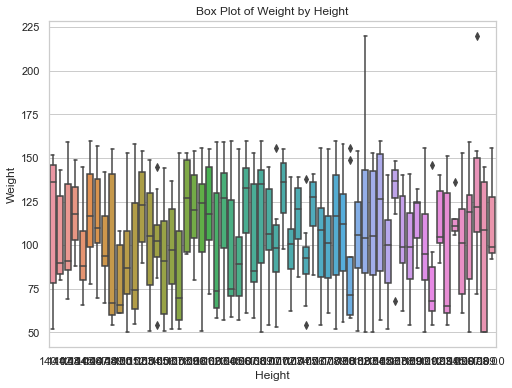

In [20]:
# Create a box plot
# Set the style for seaborn
sns.set(style="whitegrid")

# Create a box plot using seaborn
plt.figure(figsize=(8,6))
sns.boxplot(x='Height', y='Weight', data=df)

# Add labels and title
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Box Plot of Weight by Height')

# Show the plot
plt.show()

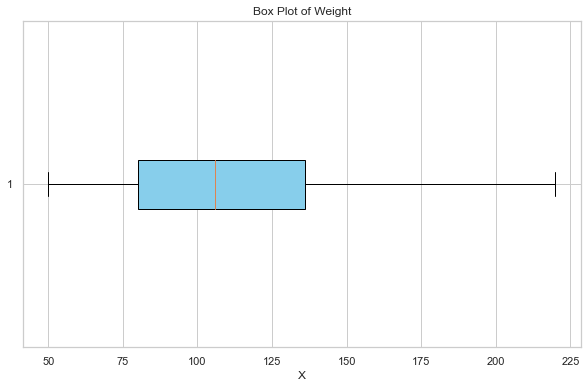

In [21]:
X = df['Weight']

plt.figure(figsize=(10, 6))  
plt.boxplot(X, vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Box Plot of Weight')
plt.xlabel('X')

plt.show()

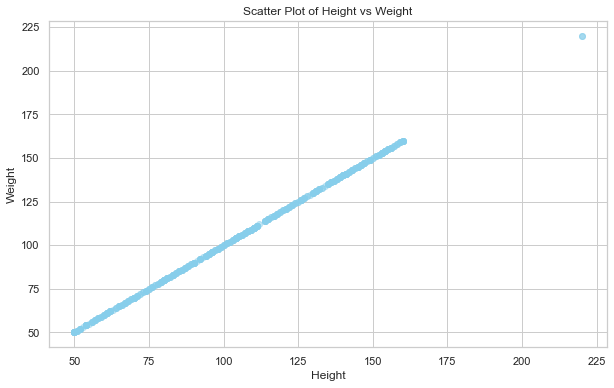

In [22]:
Y = df['Weight']

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.scatter(X, Y, alpha=0.5, color='skyblue')
plt.title('Scatter Plot of Height vs Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

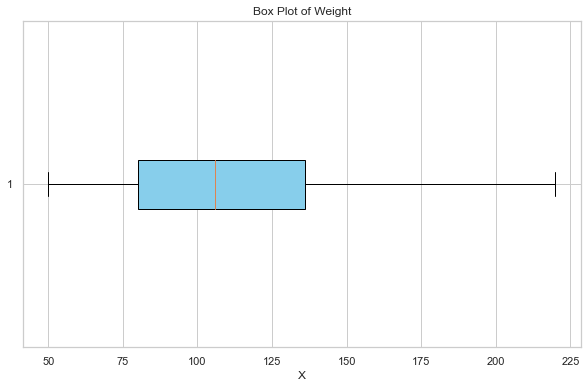

In [23]:
plt.figure(figsize=(10, 6))  
plt.boxplot(Y, vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Box Plot of Weight')
plt.xlabel('X')

plt.show()

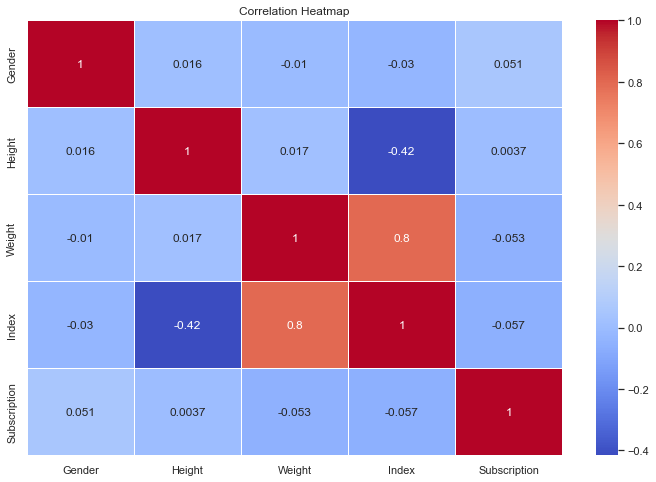

In [24]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

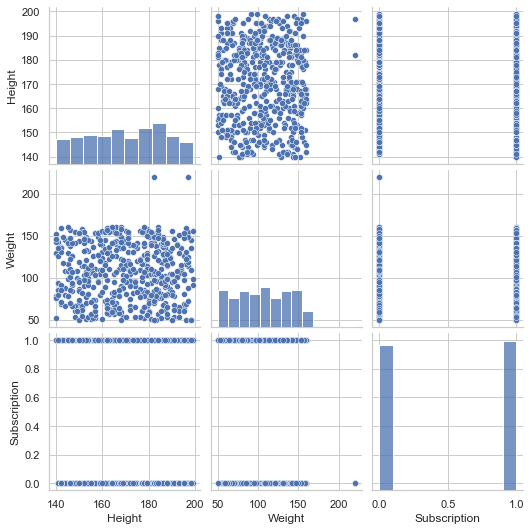

In [25]:
sns.pairplot(df[['Height', 'Weight', 'Subscription']])
plt.show()

In [26]:
import numpy as np
z_scores = np.abs((df.Height - np.mean(df.Height)) / np.std(df.Height))
outliers = df[z_scores > 3]

outliers[['Weight','Height']]

,Weight,Height


In [27]:
x = df[['Weight','Height']]
x

,Weight,Height
0,96.0,174.0
1,87.0,189.0
2,110.0,185.0
3,104.0,195.0
4,61.0,149.0
...,...,...
499,153.0,150.0
500,121.0,184.0
501,136.0,141.0
502,95.0,150.0


In [28]:
y = df[['Index']]
y

,Index
0,4
1,2
2,4
3,3
4,3
...,...
499,5
500,4
501,5
502,5


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")

X_train: (403, 2)
X_test: (101, 2)


In [30]:
# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Calculate the coefficients
slope = model.coef_[0]
intercept = model.intercept_

# Print the coefficients
print(f"Slope (Coefficient): {slope}")
print(f"Intercept: {intercept}")

Slope (Coefficient): [ 0.03252576 -0.03521083]
Intercept: [6.27310972]


In [31]:
y_pred = model.predict(X_test)

In [32]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {round(mse,2)}")
print(f"R-squared (Coefficient of Determination): {round(r2,2)}")

Mean Squared Error: 0.26
R-squared (Coefficient of Determination): 0.86


In [35]:
# Make predictions on the New data
Weight=104
Height=194

y_pred = model.predict([[Weight,Height]])

print(f"Predicted bmi: {round(y_pred[0][0])}")

Predicted bmi: 3


C:\Users\Abhignan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [36]:
# save the model
import pickle
pickle.dump(model, open("Bmi.pkl", "wb"))